# Regression: Linear Regression

Linear Regression is a **Supervised Learning method**, where the predicted output will be continuous in nature. Examples include predicting prices, grades, and other continuous outcomes.

It's a foundational statistical and machine learning technique for modeling the relationship between a dependent variable (the target or response variable) and one or more independent variables (predictors or features).

The objective is to establish a linear equation that best represents the connection between these variables. This enables predictions and insights to be drawn from the data.

The primary aim of linear regression is to identify the "best-fit" line (or hyperplane in multiple dimensions) that minimizes the discrepancies between predicted values and observed actual values.

This best-fit line is represented by the linear equation:

$$
Y = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$$

Where:
- $Y$ represents the dependent variable we wish to predict.
- $(X_1, X_2, \dots, X_n)$ are the independent variables or features.
- $(b_0)$ is the intercept (the value of \(Y\) when all \(X\) values are zero).
- $(b_1, b_2, \dots, b_n)$ are the coefficients defining the relationship between each independent variable and the dependent variable.

Linear regression assumes a linear relationship between the predictors and the target variable.

The model's goal is to estimate the coefficients $(b_0, b_1, \ldots, b_n)$ that minimize the sum of the squared differences between the predicted and actual values in the training data, a process often termed as "fitting the model."


# Linear Regression Example – Car Price Prediction Model

In this example, we'll explore how to predict car prices by building a Linear Regression model using a dataset of used cars. The dataset comes from [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) and contains information about used cars, making it an excellent resource for demonstrating linear regression in Machine Learning.

## Dataset Overview

The dataset includes the following columns:

- `name`: The make and model of the car.
- `year`: The year the car was manufactured.
- `selling_price`: The price at which the car is being sold.
- `km_driven`: The total kilometers driven by the car.
- `fuel`: The type of fuel the car uses (e.g., Petrol, Diesel, CNG, etc.).
- `seller_type`: Whether the seller is an individual or a dealer.
- `transmission`: The type of transmission in the car (Automatic or Manual).
- `owner`: The number of previous owners the car has had.

## Goal

Our objective is to predict the `selling_price` of a car based on its features, such as `year`, `km_driven`, `fuel`, `seller_type`, `transmission`, and `owner` status. By applying Linear Regression, we aim to model the relationship between these features and the car's selling price to make accurate predictions.


In [95]:
# Import pandas library
import pandas as pd

# Import the dataset
df = pd.read_csv('car data.csv')

# Pre-process the dataset (starting with displaying the dataset's info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
# Returns the number of unique car names in our dataset
df['Car_Name'].nunique()

98

In [97]:
# Dropping the 'Car_Name' column as it's highly cardinal and not as relevant for a basic linear model
df.drop('Car_Name', axis=1, inplace=True)

Feature Engineering ("Age" Column Creation): The purpose of creating an "Age" column is to transform the year data into a more directly useful metric for analysis or modeling. In many contexts, especially in vehicle valuation, the age of a vehicle is more relevant than the year it was made. The calculation uses the maximum year found in the dataset plus one to ensure that the age is calculated relative to the year following the most recent year in the dataset. This approach accounts for the dataset's time frame and provides a uniform age metric across all entries.

Removing the "Year" Column: Once the "Age" column has been created, the original "Year" column is dropped from the DataFrame. This step is taken because the "Year" information is now encapsulated in the "Age" column, and keeping the "Year" column would be redundant. Additionally, removing unnecessary or redundant columns simplifies the dataset and can help improve model performance by focusing on more relevant features.

In [98]:
# Insert a new column named "Age" at the beginning (index 0) of the DataFrame. 
# The "Age" column is calculated based on the maximum year found in the "Year" column plus one, minus the "Year" column itself.
# This effectively transforms the "Year" of the car into its "Age" at the time of the analysis.
df.insert(0, "Age", df["Year"].max() + 1 - df["Year"])

# Remove the "Year" column from the DataFrame as it's no longer needed after transforming it into the "Age" column.
df.drop('Year', axis=1, inplace=True)

# Finding Outliers Using the Interquartile Range (IQR)

Outliers are data points that differ significantly from other observations in the dataset. These can be caused by measurement errors, data entry errors, or extreme variation in the data. Outliers can significantly affect the results of data analysis and statistical modeling.

## The IQR Method for Outlier Detection

The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and 25th percentile (Q1) in the data. This range defines the middle 50% of the data points.

The IQR can be used to identify outliers with these steps:

1. Calculate the first (Q1) and third (Q3) quartiles of the dataset.
2. Compute the IQR by subtracting Q1 from Q3: `IQR = Q3 - Q1`
3. Determine the "minimum" threshold as `Q1 - 1.5 * IQR`.
4. Determine the "maximum" threshold as `Q3 + 1.5 * IQR`.
5. Any data points outside these thresholds are considered outliers.

Here's a visual representation of the IQR and how it's used to detect outliers:

<img src="image-26.png" alt="My Image" width="500"/>

The pink box represents the interquartile range, with the line inside indicating the median of the data. The "whiskers" on either side of the IQR box extend to the minimum and maximum thresholds. Points beyond these whiskers are considered outliers.

Categorical columns will have the datatype as "object". Let's group the numerical columns and categorical columns in a NumPy array. The first 5 elements in the array will be numerical columns and the rest 3 will be categorical columns. We can plot the data in the columns using the seaborn library. Categorical columns will contain multiple bars, whereas numerical columns will contain single bars.

Let's try to find the outliers in our dataset using the following code:

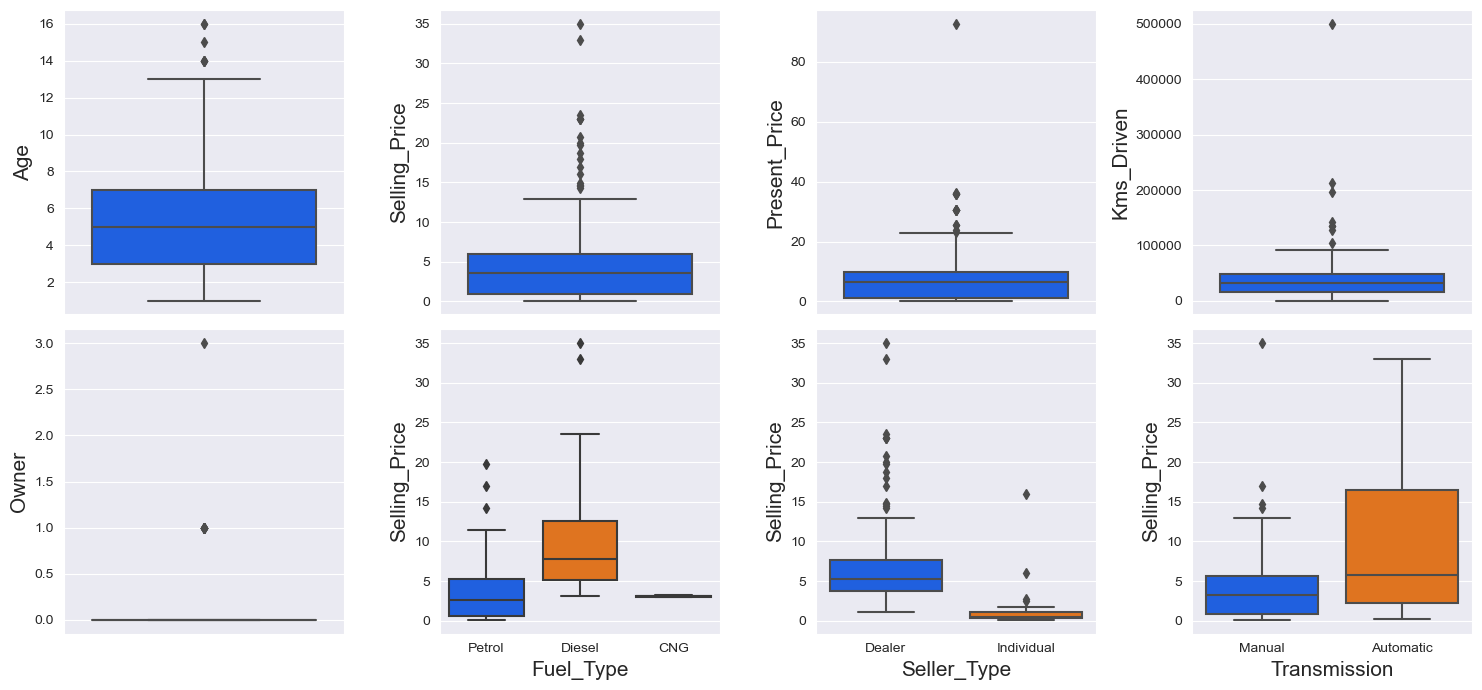

In [99]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

Let's try to find the outliers using the InterQuartile Range rule: 

In [100]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


But keep in mind that it's not always the right decision to remove the outliers. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not.

We can delete outliers in two cases:

Outlier is due to incorrectly entered or measured data
Outlier creates a significant association
Let's dig even more and find the perfect outliers.

To do that, let's assume that if the selling price is more than 33 Lakhs or if the car has been driven more than 400,000 Kilometers, those are outliers. We'll mark them in green. Save all the indices in the removing_indices variable. Plot them in the scatterplot format using seaborn library, comparing each column against our target column.

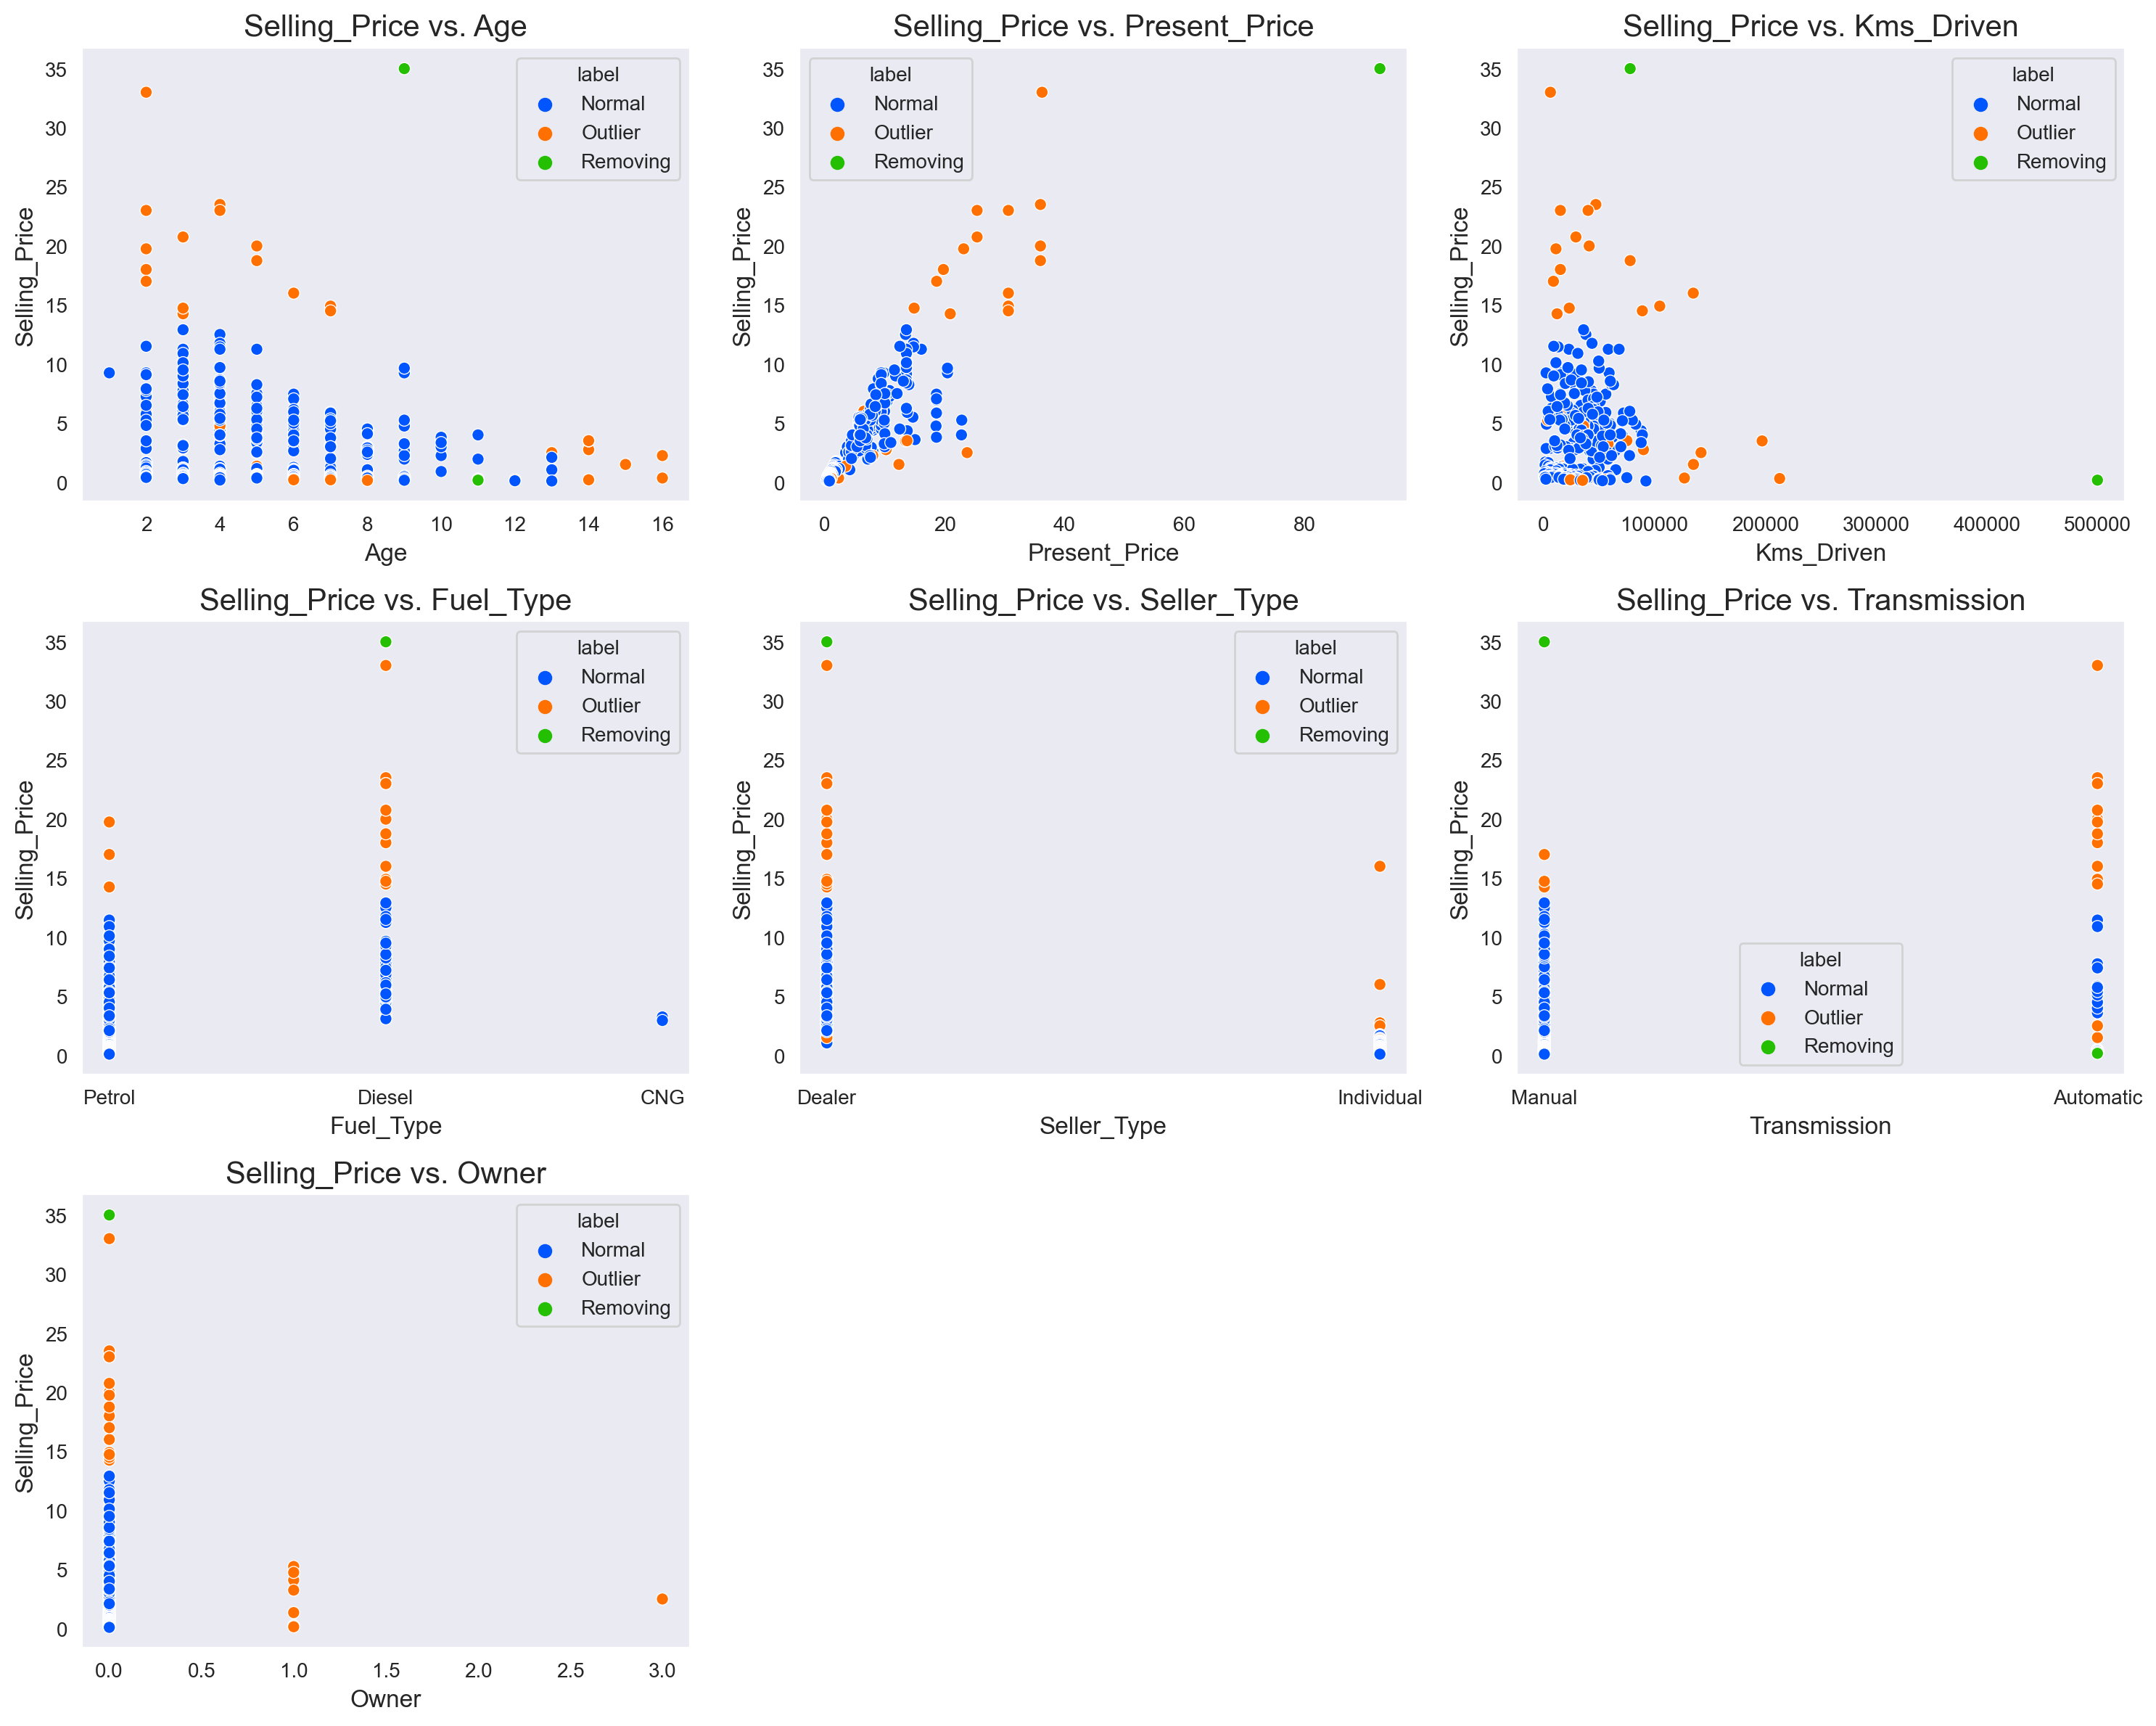

In [101]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [102]:
# Let's see the perfect outliers:

removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [103]:
# We got 2. We have to remove them. But before that, we have to check if there's any null data in our dataset.

df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [104]:
# Let's remove the identified outliers and reset the index of the dataframe.

df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

## Analyze the Dataset
Let's analyze the data to see how much each field/category is correlated with the selling price of the car. We need to do some analysis on our dataset to be able to come to some conclusions about it.

To do that, we have to identify the numerical and categorical fields in our dataset, as the way to plot this differs for each type.

In [105]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

Let's compare the Selling Price with the other columns using Bivariate Analysis and try to derive some conclusions out of that data.

### Selling Price vs Numerical Features Bivariate Analysis
Let's compare the numerical features with the Selling Price using Bivariate analysis. The Numerical columns will be plotted in a scatter graph.

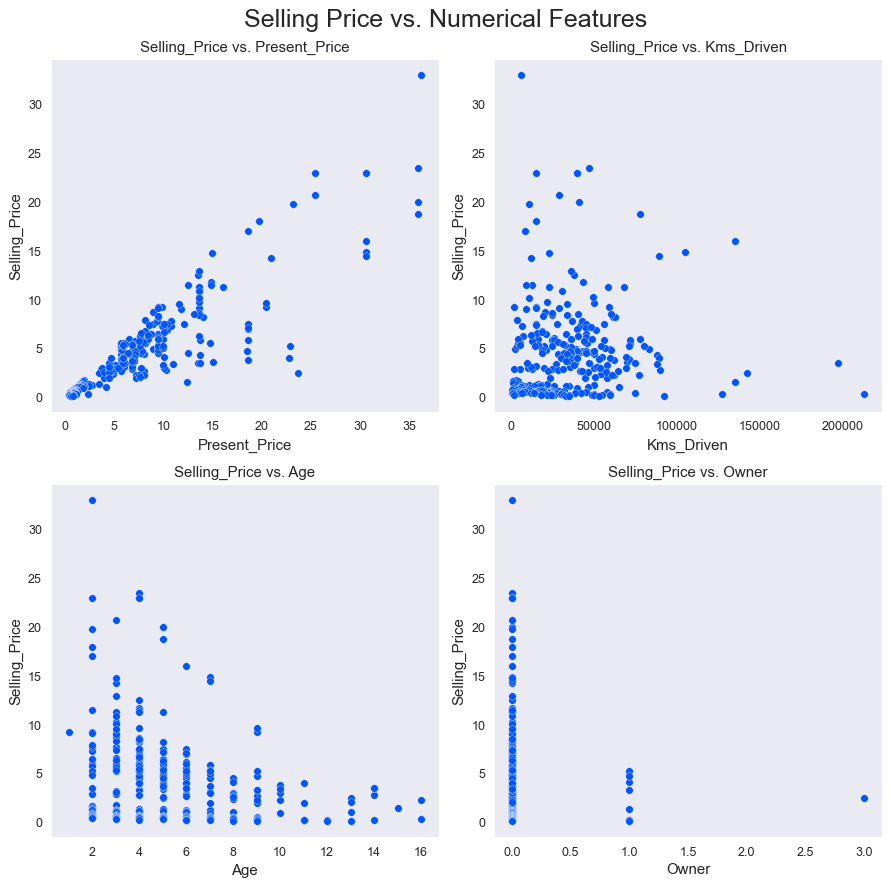

In [106]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

* As Present Price increases, Selling Price increases as well. They're directly proportional. This plot shows a positive correlation between the present price of a car and its selling price.
* Selling_Price vs. Kms_Driven: The plot doesn't show a clear correlation between kilometers driven and the selling price. This suggests that the number of kilometers driven may not be a strong predictor of the selling price on its own. Most of the data points are concentrated in the lower range of kilometers driven, with the selling price decreasing slightly as kilometers increase.
* Selling Price is inversely proportional to the car's age. There appears to be a negative correlation between the age of the car and the selling price. Generally, as cars get older, their selling prices decrease. The concentration of points at the lower age and higher selling price suggests that newer cars tend to sell for more, as expected. 
* As the number of previous car owners increases, its Selling Price decreases. So Selling Price is inversely proportional to Owner. There's a noticeable decrease in selling price as the number of owners increases, which implies that cars with more previous owners tend to sell for less.

### Selling Price vs Categorical Features Bivariate Analysis

Let's compare the categorical features with the Selling Price using Bivariate analysis. The Categorical columns will be plotted in a stripplot graph. This gives the comparison among multiple values in a category.

/Users/tanyakhanna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanyakhanna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanyakhanna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tanyakhanna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_

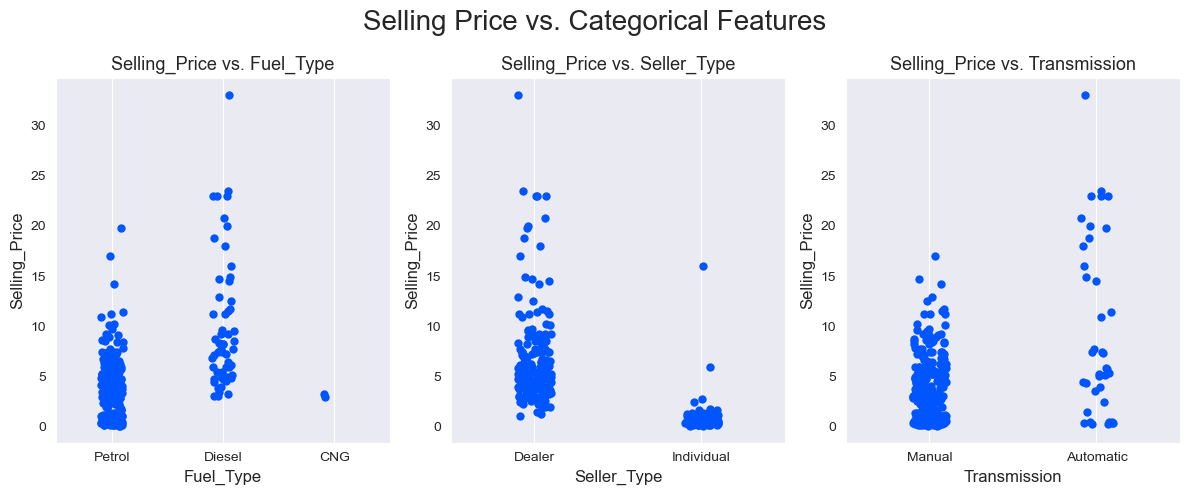

In [107]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

* Diesel Cars > CNG Cars > Petrol Cars in terms of Selling Price.
* The Selling Price of cars sold by individuals is lower than the price of cars sold by dealers.
* Automatic cars are more expensive than manual cars.

### Categorical Variables Encoding

We can't use the Categorical fields as they are. They have to be converted to numbers because machines can only understand numbers.

For an example, let's take the Fuel column. As per our dataset, we have cars running on two types of fuel. They are Petrol and Diesel. The categorical variable encoding will split the fuel column into 2 columns (Fuel_Type_Petrol and Fuel_Type_Diesel).

Let's assume a car runs on Petrol. For this car, the data will be converted as Fuel_Type_Petrol column set to 1 (True), and Fuel_Type_Diesel column set to 0 (False). Computers can understand 1 and 0 rather than "Petrol" and "Diesel".

To do that, we'll perform one-hot encoding for the categorical columns. Pandas offers the get_dummies method to encode the columns.

In [108]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


### Correlation Analysis

A correlation matrix is a matrix that summarizes the strength and direction of the linear relationships between pairs of variables in a dataset. It is a crucial tool in statistics and data analysis, used to examine the patterns of association between variables and understand how they may be related.

The correlation is directly proportional if the values are positive, and inversely proportional if the values are negative.

Here's the code to find the correlation matrix with relation to Selling Price.

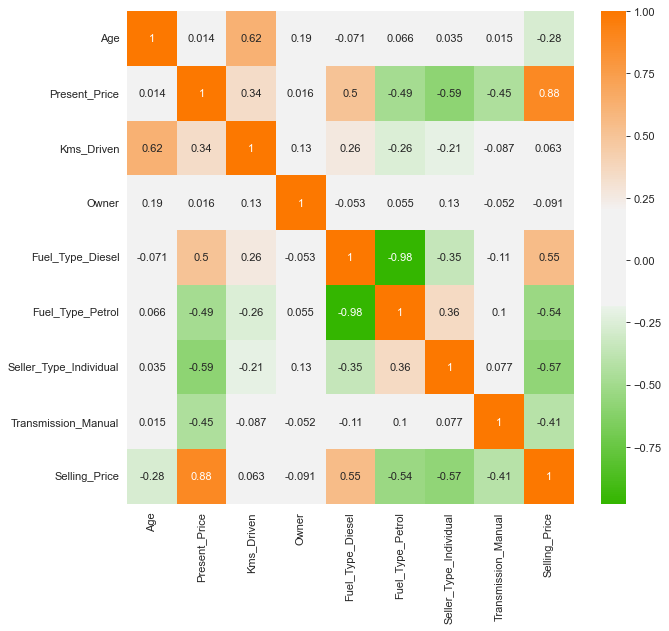

In [109]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

From the above matrix, we can infer that the target variable "Selling Price" is highly correlated with Present Price, Seller Type, and Fuel Type.

### How to Build the Model

We have come to the final stage. Let's train and test our model.

Let's remove the "Selling_Price" from input and set it to output. This means that it has to be predicted.

In [110]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

In [111]:
# Let's split our dataset by taking 70% of data for training and 30% of data for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [116]:
# Let's make a backup of our test data. We need this for the final comparison.

y_test_actual = y_test


### Normalize the dataset

The StandardScaler is a preprocessing technique commonly used in machine learning and data analysis to standardize or normalize the features (variables) of a dataset. Its primary purpose is to transform the data such that each feature has a mean (average) of 0 and a standard deviation of 1.

Let's normalize our dataset using StandardScaler.

It is very important that StandardScaler transformation should only be gotten from the training set, otherwise it will lead to data leakage.

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Train the model

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [120]:
# Let's find the intercept and co-efficient for each column in our training dataset.

pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)


,Value
Intercept,4.302488
Present_Price Coef.,3.492729
Fuel_Type_Diesel Coef.,0.850217
Fuel_Type_Petrol Coef.,0.207319
Transmission_Manual Coef.,0.027375
Owner Coef.,-0.232722
Seller_Type_Individual Coef.,-0.377334
Kms_Driven Coef.,-0.589672
Age Coef.,-0.936339


### How to evaluate the model

Scikit Learn provides a metrics feature which helps us to measure the metrics of our model. We can use that to determine metrics include Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R2-Score.

In [121]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


### Evaluate the model using K-fold Cross-Validation

In k-fold cross-validation, the dataset is divided into k roughly equal-sized subsets or "folds." The model is trained and evaluated k times, each time using a different fold as the validation set and the remaining folds as the training set.

The results (for example accuracy, error) of these k runs are then averaged to obtain a more robust estimate of the model's performance.

The advantage is that each data point is used for both training and validation, reducing the risk of bias in the evaluation.

In [123]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,1.154774,0.147377
MSE,3.131755,1.314319
RMSE,1.728702,0.378609
R2-Score,0.855703,0.033720


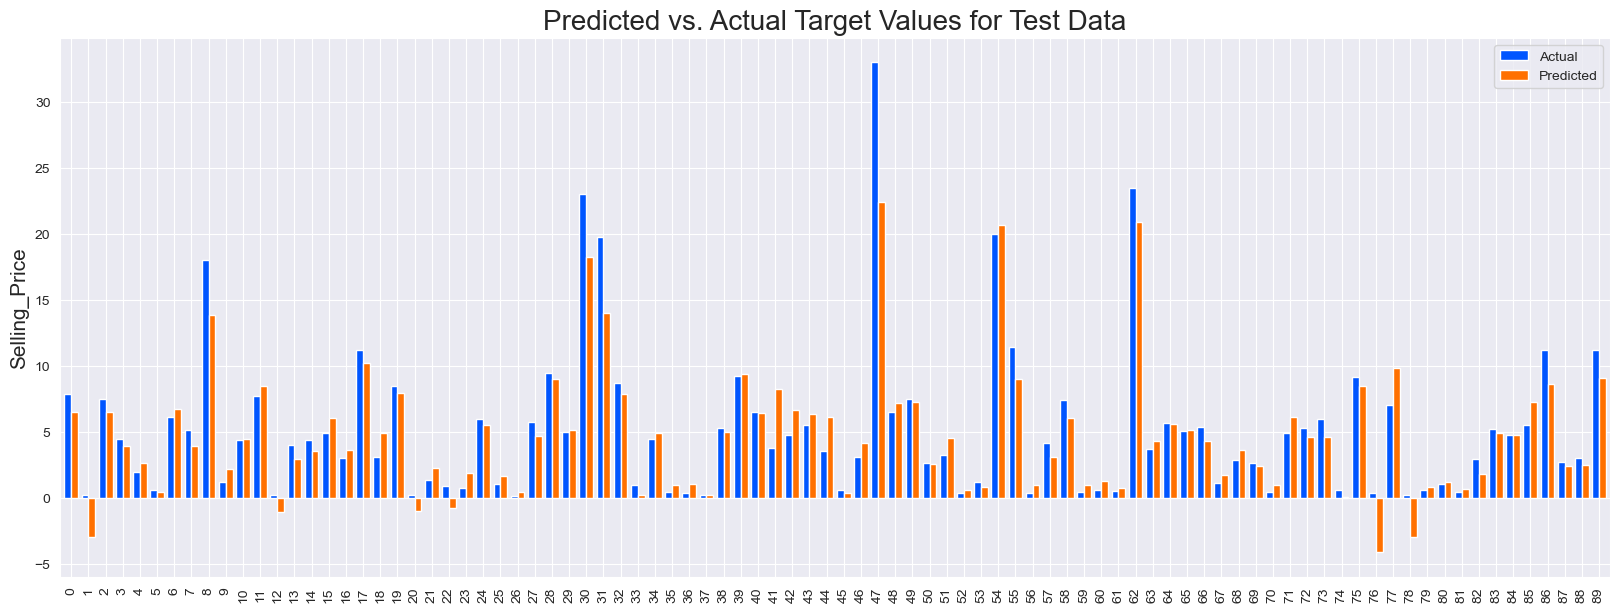

In [124]:
## Results Visualization: Let's create a dataframe with the actual and predicted values.

y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

# Let's compare the actual and predicted target values for the test data with the help of a bar plot.

def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)

In the above graph, the blue lines indicates the actual price and orange lines indicate the predicted price of the cars. You can see that some predicted values are negative. But in most of our cases, our model has predicted it pretty well.

# Supervised Learning: Classification

As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem.

Classification is a two-step process; a learning step and a prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response to given data. A Decision tree is one of the easiest and most popular classification algorithms used to understand and interpret data. It can be utilized for both classification and regression problems.

### Decision Tree Algorithm

Decision trees are like flowcharts that can be used for making predictions or classifications. They are a type of machine learning algorithm that uses a tree-like structure to represent decisions and their possible consequences.

Here's a breakdown of how they work:

* **Structure**: The tree is made up of nodes and branches. The root node is at the top, and it represents the initial question or decision. The branches coming out of the root node lead to child nodes, which could be questions or decisions based on the answer to the previous question. This branching continues until you reach the leaf nodes, which represent the final classifications or predictions.
* **Learning**: In machine learning, decision trees are trained on a dataset. The algorithm learns by splitting the data into subsets based on the most important features in the data. This process continues recursively until the data is classified or the predictions are made.

Some of the advantages of decision trees:

* **Easy to understand**: Because of their flowchart-like structure, decision trees are easy to visualize and interpret, even for people without a machine learning background.
* **Can handle different data types**: Decision trees can work with both categorical and numerical data.
* **Effective for various tasks**: They can be used for both classification and regression tasks.


<img src="decision_tree_for_heart_attack_prevention_2140bd762d.png" alt="My Image" width="700"/>

### Decision Tree Terminology

**Nodes:** The building blocks of the tree. There are three main types:

* **Root Node:** The starting point, representing the entire dataset or question.
* **Internal Nodes (Decision Nodes):** Represent questions or decisions based on features in the data. They split into child nodes. 
* **Leaf Nodes (Terminal Nodes):** The end points, representing the final classification or prediction. (e.g., "approve loan" or "spam email").

**Splitting/Branching:** Dividing a node into child nodes based on a specific condition or feature value. The goal is to create purer subsets of data at each branch. 

**Parent Node vs. Child Node:**
* **Parent Node:** The node that splits into child nodes.
* **Child Node:** The resulting node from a split.

**Impurity:** A measure of how mixed up the data is at a particular node. In simpler terms, it represents the randomness or uncertainty in classifying the data points within that node. Common impurity measures include Gini index and entropy.

**Pruning:** An optional technique to remove less important branches from the tree to avoid overfitting the data. Overfitting happens when the tree becomes too complex and memorizes the training data too well, losing its ability to generalize to unseen data.


### How Does the Decision Tree Algorithm Work?

Decision Trees work by splitting the dataset into two or more homogeneous sets based on the most significant attributes making as distinct groups as possible. For decision trees, the data is split according to a decision threshold. This is all done using the following steps:

1. Select the best attribute using Attribute Selection Measures (ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the conditions will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

<img src="2_btay8n.webp" alt="My Image" width="700"/>

### Key Concepts in Decision Trees and Information Theory

## Splitting

- Splitting is like sorting things into different boxes based on their features. If you have fruits, you might put all apples in one box and all oranges in another based on their color or taste. Splitting is the process of dividing the data into subsets based on certain conditions. It's used in decision trees to create branches, where each branch represents a possible outcome of the condition.
- Consider a dataset $D$. A split partitions $D$ into subsets $\{D_1, D_2, ..., D_k\}$ based on a feature $F$ such that $\bigcup_{i=1}^{k} D_i = D$ and $D_i \cap D_j = \emptyset$ for $i \neq j$.

## Purity

- Purity is when a box contains only one type of thing. A box of only apples is pure, but if it has both apples and oranges, it's impure. Purity refers to how uniform the members of a subset are with respect to the target variable. High purity means that a subset contains mostly or entirely the same class.
- Purity can be quantified using various metrics, such as Gini impurity, defined for a set $D$ as $Gini(D) = 1 - \sum_{i=1}^{n} p_i^2$, where $p_i$ is the proportion of class $i$ in $D$.

## Homogeneity

- Homogeneity is similar to purity; it's about having items of the same kind in a group. A homogenous group is pure.
- Homogeneity is a measure of how similar the elements of a subset are. In the context of classification, a subset is homogenous if it contains only one class of the target variable.
- Homogeneity can be directly related to purity measures, with a homogenous subset having a purity score of 1 by certain metrics (e.g., Gini impurity of 0).

## Entropy

- Entropy measures how mixed up things are. In a room, if everything is scattered everywhere, the entropy is high; if everything is neatly organized, the entropy is low.
- Entropy is used as a measure of impurity or disorder within a dataset. It helps decide how to split data at decision nodes to create more homogeneous subsets. The function of entropy is to guide the construction of decision trees by identifying features that result in the greatest reduction of uncertainty (entropy) in the child nodes after a split. It helps select the most informative features for classification or regression tasks.
- High entropy indicates high disorder, while low entropy indicates order or purity.
- The entropy of a set $D$ is defined as $Entropy(D) = -\sum_{i=1}^{n} p_i \log_2(p_i)$, where $p_i$ is the proportion of class $i$ in $D$.

## Information Gain

- Information gain is like figuring out which question to ask that gives you the most useful information to sort things quicker. Asking "Is it an apple?" when sorting fruits gives you more useful information than "Is it a fruit?".
-  Information gain measures the reduction in entropy or impurity before and after a dataset is split on an attribute. It's used to decide which feature to split on by selecting the one that results in the highest information gain.
-  A high information gain means that the split results in a more orderly separation of data. Decision tree algorithms aim to maximise information gain when choosing which feature to split on. They select the feature that leads to the greatest reduction in uncertainty or entropy within the child nodes.
-  The information gain from splitting a set $D$ into subsets $\{D_1, D_2, ..., D_k\}$ based on feature $F$ is defined as $IG(D, F) = Entropy(D) - \sum_{i=1}^{k} \frac{|D_i|}{|D|} Entropy(D_i)$.



### Example Problem

James and Harry, two golfers, used the "Play Golf Dataset" to predict if Rahul would join for a game. They analysed factors like weather conditions, temperature, humidity, and wind to make their predictions. The dataset helped them make informed decisions about their golf outings, ensuring an enjoyable time on the course.

Entropy is a measure of impurity or uncertainty. When considering a decision like whether to play golf based on the dataset, the entropy reflects how much uncertainty there is in the outcome. If every day with a certain outlook (like Sunny) resulted in the same decision (like No), then the entropy would be zero — there's no uncertainty.

# Entropy Formula and Explanation

The formula for calculating the entropy of a dataset is given by:

$ \text{Entropy}(S) = -\frac{p}{p+n} \log_2 \left( \frac{p}{p+n} \right) - \frac{n}{p+n} \log_2 \left( \frac{n}{p+n} \right) $

Where:

- **Entropy(S)** represents the entropy of the dataset \( S \).
- \( p \) is the number of positive instances (e.g., instances belonging to a particular class) in the dataset \( S \).
- \( n \) is the number of negative instances (e.g., instances not belonging to that class) in the dataset \( S \).
- $\log_2(x) $ represents the logarithm of \( x \) with base 2.

**Interpretation:**
The more uncertain or unpredictable the outcomes, the higher the entropy.


<img src="1704094343805.png" alt="My Image" width="400"/>

In [125]:
# Calculating Entropy of Play Golf Columns
from math import log2

#number of 'Yes'
p = 9 
#number of 'No'
n = 5 

#entropy
entropy_s = -(p/(p+n)) * log2(p/(p+n)) - (n/(p+n)) * log2(n/(p+n))

print("Entropy (S) : ", entropy_s)

Entropy (S) :  0.9402859586706311


## Entropy for Outlook

#### Entropy when Outlook is Sunny

p = 2(Yes) & n = 3(No)

<img src="1704102656727.png" alt="My Image" width="400"/>

#### Entropy when Outlook is Rainy
p = 3(Yes) & n = 2(No)


<img src="1704102726156.png" alt="My Image" width="400"/>

#### Entropy when Outlook is Overcast


<img src="1704102760997.png" alt="My Image" width="800"/>

In [126]:
outlook_values = {
    "Sunny": {"Yes": 2, "No": 3},
    "Rainy": {"Yes": 3, "No": 2},
    "Overcast": {"Yes": 4, "No": 0}  
}

In [127]:
def entropy(yes, no):
    total = yes + no
    entropy_yes = -(yes/total) * log2(yes/total) if yes else 0
    entropy_no = -(no/total) * log2(no/total) if no else 0
    return entropy_yes + entropy_no

entropies = {}

for i, j in outlook_values.items():
    entropies[i] = entropy(j["Yes"], j["No"])

In [128]:
print(entropies)

{'Sunny': 0.9709505944546686, 'Rainy': 0.9709505944546686, 'Overcast': 0.0}


Now we have calculated entropy for Play Golf and Outlook columns. where overall entropy of play golf is 0.9402. similarly entropy for sunny is 0.9709, entropy for rainy is 0.9709 and overcast is 0.0 

Average Information Entropy for the Outlook attribute specifically refers to the expected entropy or uncertainty that remains about the Play Golf decision after considering the information provided by the outlook attribute. It is a weighted sum of the entropies of the subsets of the data corresponding to each value of the outlook attribute.

- Information Entropy of a Subset: For each value of the 'Outlook' attribute (Sunny, Rainy, Overcast), we calculate the entropy separately. This is done by looking at the subset of data where 'Outlook' is that particular value and then calculating how uncertain the 'PlayGolf' decision is within that subset.
-  Weighted Average: Since different 'Outlook' values might have different numbers of days (like more Sunny days than Overcast days), each subset's entropy is weighted by the proportion of the total instances that fall into that subset. This weighting gives us a fair average that accounts for the different sample sizes.
- Average Information Entropy: Finally, the Average Information Entropy for 'Outlook' is the sum of these weighted entropies. It represents the average amount of uncertainty that remains about the decision to play golf if we only know the outlook of the day. A lower Average Information Entropy after splitting on an attribute indicates that the attribute is good at reducing uncertainty and thus is a good choice for making a decision or for splitting the data in a decision tree algorithm.

<img src="1704099516389.png" alt="My Image" width="1000"/>

P for yes and N for No. where, P value and N value are the counts of yes and now for each outlook.


<img src="1704099629374.png" alt="My Image" width="800"/>

The gain is calculated by subtracting the average information entropy of the attribute from the total entropy of the PlayGolf column.

<img src="1704099478498.png" alt="My Image" width="500"/>

In [129]:
#defining the entropies for each outlook
entropy_sunny = 0.971
entropy_rainy = 0.971
entropy_overcast = 0.0
entropy_s = 0.940

#counts of Yes and No for each outlook 
sunny_p = 2
sunny_n = 3
rainy_p = 3
rainy_n = 2
overcast_p = 4
overcast_n = 0

#total counts of Yes and No
total_p = 9
total_n = 5
total = total_p + total_n

#weighted average entropy for outlook
weighted_entropy_outlook = (
    ((sunny_p + sunny_n) / total) * entropy_sunny +
    ((rainy_p + rainy_n) / total) * entropy_rainy +
    ((overcast_p + overcast_n) / total) * entropy_overcast
)

#information gain 
information_gain_outlook = entropy_s - weighted_entropy_outlook

In [130]:
weighted_entropy_outlook

0.6935714285714286

In [131]:
information_gain_outlook

0.24642857142857133

## Entropy for Temperature

<img src="1704097000111.png" alt="My Image" width="200"/>

For the temperature attribute, the entropy is calculated for each of its possible values, which are hot, mild, and cool. High entropy indicates a greater level of disorder and thus a lesser degree of predictability, which is not ideal for splitting the data.

#### Entropy for Each Temperature 

<img src="1704099451756.png" alt="My Image" width="400"/>

#### Average Information Entropy for Temperature

The average information entropy is calculated by weighting the entropies by the proportion of instances for each temperature value.

<img src="1704099435036.png" alt="My Image" width="800"/>


#### Gain for Temperature

The gain for the temperature attribute is calculated as the difference between the total entropy and the average information entropy for temperature.

<img src="1704099381364.png" alt="My Image" width="400"/>



In [132]:
#entropy for each temperature value
def entropy(p, n):
    #avoid log(0)
    if p == 0 or n == 0:  
        return 0
    total = p + n
    return -p/total * log2(p/total) - n/total * log2(n/total)

#entropy for each temperature value
entropy_hot = entropy(2, 2)
entropy_mild = entropy(4, 2)
entropy_cool = entropy(3, 1)

#total entropy 
total_entropy = 0.940

#weighted average information entropy for the temperature
#total yes
p_total = 9  
#total no
n_total = 5  
total_instances = p_total + n_total

I_temperature = (
    ((2 + 2) / total_instances) * entropy_hot +
    ((4 + 2) / total_instances) * entropy_mild +
    ((3 + 1) / total_instances) * entropy_cool
)

#gain for the Temperature
gain_temperature = total_entropy - I_temperature

print(f'Entropy for Hot Temperature: {entropy_hot:.3f}')
print(f'Entropy for Mild Temperature: {entropy_mild:.3f}')
print(f'Entropy for Cool Temperature: {entropy_cool:.3f}')
print(f'Average Information Entropy for Temperature: {I_temperature:.3f}')
print(f'Information Gain for Temperature: {gain_temperature:.3f}')

Entropy for Hot Temperature: 1.000
Entropy for Mild Temperature: 0.918
Entropy for Cool Temperature: 0.811
Average Information Entropy for Temperature: 0.911
Information Gain for Temperature: 0.029


In [133]:
temperature_data = {
    'Temperature': ['Hot', 'Mild', 'Cool'],
    'Yes': [2, 4, 3],
    'No': [2, 2, 1],
    'Entropy': [entropy_hot, entropy_mild, entropy_cool]
}

temperature_df = pd.DataFrame(temperature_data)
temperature_df

,Temperature,Yes,No,Entropy
0,Hot,2,2,1.000000
1,Mild,4,2,0.918296
2,Cool,3,1,0.811278


### Entropy for Humidity

<img src="1704098399306.png" alt="My Image" width="200"/>


#### Entropy for Each Humidity

To determine the best attribute for splitting the data in a decision tree, we calculate the entropy for each attribute. For the humidity attribute, we compute the entropy for each of its values—normal and high.

<img src="1704099310708.png" alt="My Image" width="500"/>

#### Average Information Entropy for Humidity

The average information entropy is calculated by weighting the entropies by the proportion of instances for each humidity value.

<img src="1704099281761.png" alt="My Image" width="500"/>

#### Gain for Humidity

The gain for the humidity attribute is calculated as the difference between the total entropy and the average information entropy for humidity.

<img src="1704099253587.png" alt="My Image" width="500"/>


In [134]:
#entropy for Normal humidity
#yes for normal humidity
p_normal = 3  
#no for normal humidity
n_normal = 4  
entropy_normal = - (p_normal / (p_normal + n_normal)) * log2(p_normal / (p_normal + n_normal)) - \
                 (n_normal / (p_normal + n_normal)) * log2(n_normal / (p_normal + n_normal))

#entropy for High humidity
#yes for high humidity
p_high = 6  
#no for high humidity
n_high = 1  
entropy_high = - (p_high / (p_high + n_high)) * log2(p_high / (p_high + n_high)) - \
        (n_high / (p_high + n_high)) * log2(n_high / (p_high + n_high))

#total
total_yes = 9  
total_no = 5   
total_instances = total_yes + total_no

#weighted average information entropy for the humidity
I_humidity = ((p_normal + n_normal) / total_instances) * entropy_normal + \
             ((p_high + n_high) / total_instances) * entropy_high

#gain for the humidity
#total entropy of the system
total_entropy = 0.940  
gain_humidity = total_entropy - I_humidity

print("Entropy for 'Normal' Humidity:", round(entropy_normal, 4))
print("Entropy for 'High' Humidity:", round(entropy_high, 4))
print("Average Information Entropy for 'Humidity':", round(I_humidity, 4))
print("Information Gain for 'Humidity':", round(gain_humidity, 4))

Entropy for 'Normal' Humidity: 0.9852
Entropy for 'High' Humidity: 0.5917
Average Information Entropy for 'Humidity': 0.7885
Information Gain for 'Humidity': 0.1515


#### Entropy for Wind

When constructing a decision tree, understanding the entropy associated with each attribute possible values is important. for the wind attribute, we look into its weak and strong categories.

In [135]:
#entropy for weak wind
#Yes for weak wind
p_weak = 6
#No for weak wind
n_weak = 2  
entropy_weak = - (p_weak / (p_weak + n_weak)) * log2(p_weak / (p_weak + n_weak)) - \
               (n_weak / (p_weak + n_weak)) * log2(n_weak / (p_weak + n_weak))

#entropy for strong wind
#yes for strong wind
p_strong = 3  
#No for strong wind
n_strong = 3  
entropy_strong = - (p_strong / (p_strong + n_strong)) * log2(p_strong / (p_strong + n_strong)) - \
                 (n_strong / (p_strong + n_strong)) * log2(n_strong / (p_strong + n_strong))


In [136]:
#weighted average information entropy for the wind
I_wind = ((p_weak + n_weak) / total_instances) * entropy_weak + \
         ((p_strong + n_strong) / total_instances) * entropy_strong

#gain for the wind
gain_wind = total_entropy - I_wind

print("Entropy for 'Weak' Wind:", round(entropy_weak,4))
print("Entropy for 'Strong' Wind:", round(entropy_strong,4))
print("Average Information Entropy for 'Wind':", round(I_wind,4))
print("Information Gain for 'Wind':", round(gain_wind,4))

Entropy for 'Weak' Wind: 0.8113
Entropy for 'Strong' Wind: 1.0
Average Information Entropy for 'Wind': 0.8922
Information Gain for 'Wind': 0.0478


Given the values, the 'Outlook' feature has the highest information gain (0.2464), making it the most effective feature for splitting the dataset to decide whether to play golf. It provides the greatest reduction in entropy compared to the other features, meaning that after splitting on 'Outlook', the subsets are more homogeneous (or pure) with respect to the target variable 'PlayGolf'.

In decision tree algorithms, the attribute with the highest information gain is usually chosen as the root node. Thus, based on the information provided, 'Outlook' should be the root of the decision tree for predicting 'PlayGolf'.

When building a decision tree, it would first branch based on 'Outlook', followed by 'Humidity' which has the second-highest information gain (0.1515), then by 'Wind' (0.0478), and lastly 'Temperature' (0.029), assuming these features are considered independently and other criteria such as maximum tree depth or minimum information gain threshold are not applied.

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [138]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df



,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [139]:
# Converting categorical variables into indicator variables

df_dummy =pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_dummy 

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


In [140]:
y = df_dummy['PlayGolf']
X = df_dummy.drop(columns='PlayGolf')

In [141]:
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

In [142]:
X

,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,0,1,0,1,0,0,0,1,0,1
1,0,1,0,1,0,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,0,0,1,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1
5,1,0,0,0,1,0,1,0,1,0
6,1,0,0,0,1,1,0,0,1,0
7,0,0,1,1,0,0,0,1,0,1
8,1,0,0,0,1,0,0,1,0,1
9,0,0,1,0,1,0,1,0,0,1


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [144]:
X_train.shape, y_train.shape


((9, 10), (9,))

In [145]:
X_test.shape, y_test.shape


((5, 10), (5,))

In [147]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

criterion='entropy' The criterion parameter specifies the criterion for making decisions in the decision tree. In this case, you've chosen 'entropy' as the criterion. Entropy is a measure of impurity or disorder in a dataset. When building a decision tree, the algorithm aims to reduce entropy at each node, which means it tries to create splits that result in more homogeneous groups of data points. Entropy is one of the criteria used to determine the best feature to split on at each node.

max_depth=2 The max_depth parameter sets the maximum depth or height of the decision tree. In this code, you've limited the depth of the tree to 2 levels. This means that the tree will have a root node, two child nodes at the first level, and leaf nodes at the second level. Limiting the maximum depth of the tree can help prevent overfitting, which occurs when the tree captures noise or random variations in the training data. A shallower tree is simpler and less likely to overfit but may be less expressive in modeling complex relationships in the data.


In [148]:
predictions = dtree.predict(X_test)

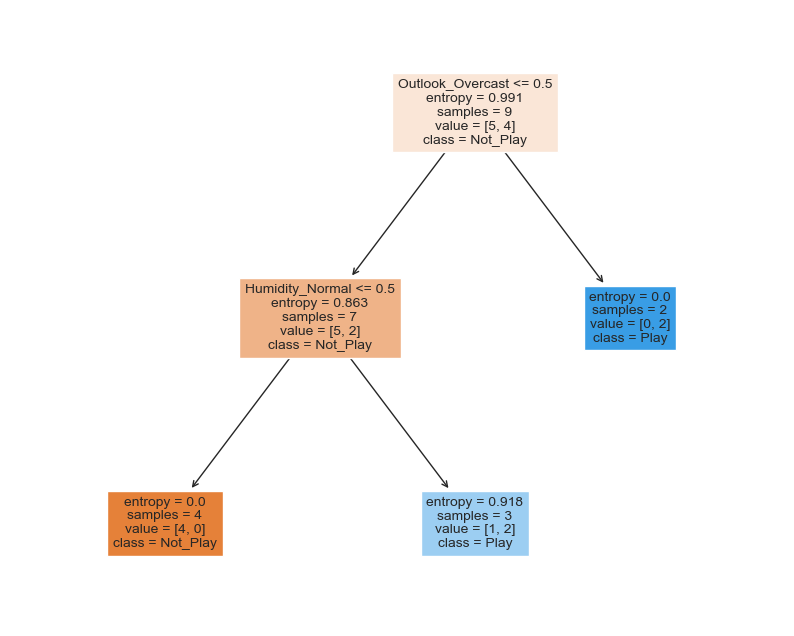

In [149]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(dtree, feature_names=list(X.columns), fontsize=10, filled=True, class_names=['Not_Play', 'Play'])


- The root node splits on the attribute `Outlook_Overcast <= 0.5`. This binary feature likely represents whether the weather is overcast.

  - If `Outlook_Overcast` is `True` (i.e., less than or equal to 0.5), we move to the left child node, which further splits on `Humidity_Normal <= 0.5`.
  
    - If `Humidity_Normal` is also `True`, the classification result at this leaf node is `Not_Play` with an entropy of 0.863. There are 7 samples at this node, with 5 instances of `Not_Play` and 2 of `Play`.
    - If `Humidity_Normal` is `False`, the classification at this leaf node is `Not_Play` with an entropy of 0.0, meaning all samples belong to the same class. There are 4 samples at this node, all classified as `Not_Play`.
  
  - If `Outlook_Overcast` is `False` (greater than 0.5), the classification at the right child node is `Play`, with an entropy of 0.0. There are 2 samples at this node, both classified as `Play`.

- Additionally, there is another leaf node directly beneath the `Humidity_Normal <= 0.5` split, with an entropy of 0.918 and 3 samples. The value distribution at this node is [1, 2], indicating a mixed classification.

The entropy values at each node indicate the level of impurity in the classification - an entropy of 0 means that all samples at that node belong to the same class. The `value` arrays show the distribution of samples between the two classes, `Not_Play` and `Play`, with the `class` label indicating the majority class for that node.

